#### With the ongoing COVID-19 pandemic, business and organizations have adapted to unconventional and different working styles and patterns, like working from home, working with limited employees in the office premise, etc. With the new normal here to stay for the recent future, employees have also adapted to different working environment and routines, which has also resulted in fatigue and stress for many, as they adapt to the new normal and adjust their personal and professional lives. 

#### Employees may feel stressed when they are unable to cope with the prolonged uncertainty and pressure. Other factors leading to stress may include feeling isolated while working remotely, lower wages or salaries, lack of opportunity for advancement or growth, unmanageable workload, extended working hours, unsatisfactory work environment, lack of connect with the team, lack of ability and skill to cope with the work apart from the fear of catching the virus.

#### Spotting early signs of stress among employees will help employers identify and address the scenario, and hence help in reducing its impact on the employee and on the organization. 

#### A company, ABC Corporation with around 20k employees is quite vigilant about the employee's mental state and hence wants to identify any such employees who might be under work-stress pre-emptively, so that appropriate remedial measures can be taken for them.  

#### The company rolled out a survey for the employees and their managers and collected data from their counseling team to identify the employees who have been through counseling for stress in the last 6 months. This information combined with the data from the HR records forms the basis of this data case. 

#### Based on this data, the company wants to build a model that can help predict if an employee is likely to be under work stress or not. 

#### Importing the libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sweetviz
import matplotlib.pyplot as plt

#### load the data

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data

,EmployeeID;Target;Age;AvgDailyHours;Department;Education;EducationField;Gender;HasFlexibleTimings;IsIndividualContributor;JobInvolvement;JobRole;JobSatisfaction;LeavesTaken;MaritalStatus;MicromanagedAtWork;MonthlyIncome;NumCompaniesWorked;PercentSalaryHike;PerformanceRating;RelationshipSatisfaction;RemoteWorkSatistfaction;SelfMotivationLevel;TotalWorkingYears;TrainingTimesLastYear;WorkLifeBalance;WorkLoadLevel;YearsAtCompany;YearsSinceLastPromotion;YearsWithCurrManager
0,100001;0;36.0;6.45;Sales;5;Technical Degree;Ma...
1,100002;0;24.0;8.48;Sales;5;Technical Degree;Ma...
2,100003;0;45.0;6.93;Research & Development;2;Te...
3,100004;1;29.0;7.1;Sales;4;Medical;Male;No;No;4...
4,100005;0;30.0;7.3;Human Resources;3;Life Scien...
...,...
15995,115996;0;19.0;6.81;Sales;2;Other;Male;Yes;Yes;...
15996,115997;0;56.0;7.6;Sales;2;Technical Degree;Fem...
15997,115998;0;26.0;6.52;Human Resources;1;Other;Fem...
15998,115999;0;29.0;6.11;Research & Development;4;Hu...


#### As we can see that the data is too messy and its stacked in a single columns so we have to clean this thing and as we can see that the records are seprated with a semi colon we can use a split and expand to do the particular task

In [5]:
lent = len(data)
frame = []
for i in range(lent):    
    datastr = str(data.values[i])
    x = datastr.split(";")
    frame.append(x)
data = pd.DataFrame(frame, columns=('EmployeeID','Target', 'Age', 'AvgDailyHours', 'Department', 'Education', 'EducationField','Gender', 'HasFlexibleTimings', 'IsIndividualContributor', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'))

#### after expanding we see some problems in a column and hence we will clean the individual columns values

In [6]:
last = data["YearsWithCurrManager"].str.split("'", n = 1, expand = True) 
data["YearsWithCurrManager"]= last[0] 

#### Dropping the columns we think wont be necessary in the model creation

In [7]:
data = data.drop(columns =['EmployeeID', 'EducationField']) 

In [8]:
data

,Target,Age,AvgDailyHours,Department,Education,Gender,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobRole,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,0,36.0,6.45,Sales,5,Male,No,Yes,1,Manufacturing Director,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,0,24.0,8.48,Sales,5,Male,No,Yes,1,Sales Representative,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,0,45.0,6.93,Research & Development,2,Female,No,Yes,3,Manufacturing Director,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,1,29.0,7.1,Sales,4,Male,No,No,4,Manufacturing Director,...,4,Medium,2,2.0,0,2,,1.0,1.0,1.0
4,0,30.0,7.3,Human Resources,3,Female,No,Yes,2,Healthcare Representative,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,19.0,6.81,Sales,2,Male,Yes,Yes,1,Manager,...,3,High,2,0.0,3,1,,0.0,0.0,0.0
15996,0,56.0,7.6,Sales,2,Female,No,No,2,Sales Executive,...,2,Low,2,7.0,2,1,Medium,6.0,2.0,2.0
15997,0,26.0,6.52,Human Resources,1,Female,No,Yes,4,Research Scientist,...,3,High,4,5.0,3,4,High,1.0,1.0,1.0
15998,0,29.0,6.11,Research & Development,4,Female,Yes,No,4,Healthcare Representative,...,1,High,2,6.0,3,1,High,1.0,1.0,1.0


In [9]:
data.columns

Index(['Target', 'Age', 'AvgDailyHours', 'Department', 'Education', 'Gender',
       'HasFlexibleTimings', 'IsIndividualContributor', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'LeavesTaken', 'MaritalStatus',
       'MicromanagedAtWork', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
data.shape

(16000, 28)

#### now we see the a problem ahead everything in this data is strings and machine learning models dont understand string so we will convert each values to the respective type of the values

In [11]:
data.dtypes

Target                      object
Age                         object
AvgDailyHours               object
Department                  object
Education                   object
Gender                      object
HasFlexibleTimings          object
IsIndividualContributor     object
JobInvolvement              object
JobRole                     object
JobSatisfaction             object
LeavesTaken                 object
MaritalStatus               object
MicromanagedAtWork          object
MonthlyIncome               object
NumCompaniesWorked          object
PercentSalaryHike           object
PerformanceRating           object
RelationshipSatisfaction    object
RemoteWorkSatistfaction     object
SelfMotivationLevel         object
TotalWorkingYears           object
TrainingTimesLastYear       object
WorkLifeBalance             object
WorkLoadLevel               object
YearsAtCompany              object
YearsSinceLastPromotion     object
YearsWithCurrManager        object
dtype: object

#### Working on changing the types of columns to their respective values

In [12]:
data["HasFlexibleTimings"] = data.HasFlexibleTimings.map(dict(Yes=1, No=0))
data["IsIndividualContributor"] = data.IsIndividualContributor.map(dict(Yes=1, No=0))
data["Gender"] = data["Gender"].astype("|S")

In [13]:
data['Department'] = data['Department'].astype(str)
data['Education'] = data['Education'].astype(str)
data['Gender'] = data['Gender'].astype(str)
data['JobRole'] = data['JobRole'].astype(str)
data['MaritalStatus'] = data['MaritalStatus'].astype(str)
data['RemoteWorkSatistfaction'] = data['RemoteWorkSatistfaction'].astype(str)

In [14]:
data['HasFlexibleTimings'] = data['HasFlexibleTimings'].astype(bool)
data['IsIndividualContributor'] = data['IsIndividualContributor'].astype(bool)

In [15]:
data['Target'] = data['Target'].astype(int)
data['SelfMotivationLevel'] = data['SelfMotivationLevel'].astype(int)
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].astype(int)
data['WorkLifeBalance'] = data['WorkLifeBalance'].astype(int)
data['MonthlyIncome'] = data['MonthlyIncome'].astype(int)
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].astype(int)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].astype(int)
data['JobSatisfaction'] = data['JobSatisfaction'].astype(int)
data['JobInvolvement'] = data['JobInvolvement'].astype(int)

In [16]:
data['YearsAtCompany'] = pd.to_numeric(data['YearsAtCompany'], downcast='float')
data['YearsSinceLastPromotion'] = pd.to_numeric(data['YearsSinceLastPromotion'], downcast='float')
data['YearsWithCurrManager'] = pd.to_numeric(data['YearsWithCurrManager'], downcast='float')
data['AvgDailyHours'] = pd.to_numeric(data['AvgDailyHours'], downcast='float')
data['LeavesTaken'] = pd.to_numeric(data['LeavesTaken'], downcast='float')
data['Age'] = pd.to_numeric(data['Age'], downcast='float')
data['TotalWorkingYears'] = pd.to_numeric(data['TotalWorkingYears'], downcast='float')
data['MicromanagedAtWork'] = pd.to_numeric(data['MicromanagedAtWork'], downcast='float')
data['PercentSalaryHike'] = pd.to_numeric(data['PercentSalaryHike'], downcast='float')
data['PerformanceRating'] = pd.to_numeric(data['PerformanceRating'], downcast='float')
data['TotalWorkingYears'] = pd.to_numeric(data['TotalWorkingYears'], downcast='float')
data['LeavesTaken'] = pd.to_numeric(data['LeavesTaken'], downcast='float')
data['LeavesTaken'] = pd.to_numeric(data['LeavesTaken'], downcast='float')
data['LeavesTaken'] = pd.to_numeric(data['LeavesTaken'], downcast='float')

In [17]:
data.dtypes

Target                        int32
Age                         float32
AvgDailyHours               float32
Department                   object
Education                    object
Gender                       object
HasFlexibleTimings             bool
IsIndividualContributor        bool
JobInvolvement                int32
JobRole                      object
JobSatisfaction               int32
LeavesTaken                 float32
MaritalStatus                object
MicromanagedAtWork          float32
MonthlyIncome                 int32
NumCompaniesWorked            int32
PercentSalaryHike           float32
PerformanceRating           float32
RelationshipSatisfaction      int32
RemoteWorkSatistfaction      object
SelfMotivationLevel           int32
TotalWorkingYears           float32
TrainingTimesLastYear         int32
WorkLifeBalance               int32
WorkLoadLevel                object
YearsAtCompany              float32
YearsSinceLastPromotion     float32
YearsWithCurrManager        

#### Now lets check for some missing values in the dataset and treat those missing values

In [18]:
data.isnull().sum()/1600*100

Target                       0.0000
Age                         37.9375
AvgDailyHours                0.0000
Department                   0.0000
Education                    0.0000
Gender                       0.0000
HasFlexibleTimings           0.0000
IsIndividualContributor      0.0000
JobInvolvement               0.0000
JobRole                      0.0000
JobSatisfaction              0.0000
LeavesTaken                  3.0625
MaritalStatus                0.0000
MicromanagedAtWork           8.6250
MonthlyIncome                0.0000
NumCompaniesWorked           0.0000
PercentSalaryHike            0.0000
PerformanceRating            0.0000
RelationshipSatisfaction     0.0000
RemoteWorkSatistfaction      0.0000
SelfMotivationLevel          0.0000
TotalWorkingYears           20.8125
TrainingTimesLastYear        0.0000
WorkLifeBalance              0.0000
WorkLoadLevel                0.0000
YearsAtCompany              20.8125
YearsSinceLastPromotion     20.8125
YearsWithCurrManager        

#### Also checking the Duplicate values 

In [19]:
dupes=data.duplicated()
print("the sum of the duplicates values")
sum(dupes)

the sum of the duplicates values


0

#### Now using the KNN imputer to impute here because the na values in the data set in more than 20% hence using KNN imputer is more feasible than using means to replace tha na values

In [20]:
impute = pd.DataFrame(data[['YearsWithCurrManager','YearsSinceLastPromotion', 'YearsAtCompany', 'TotalWorkingYears', 'MicromanagedAtWork', 'LeavesTaken', 'Age']])
impute

,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,MicromanagedAtWork,LeavesTaken,Age
0,8.0,1.0,8.0,8.0,3.0,7.0,36.0
1,0.0,0.0,0.0,1.0,4.0,9.0,24.0
2,10.0,4.0,17.0,17.0,4.0,24.0,45.0
3,1.0,1.0,1.0,2.0,2.0,7.0,29.0
4,0.0,3.0,3.0,9.0,5.0,9.0,30.0
...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,4.0,8.0,19.0
15996,2.0,2.0,6.0,7.0,2.0,14.0,56.0
15997,1.0,1.0,1.0,5.0,2.0,7.0,26.0
15998,1.0,1.0,1.0,6.0,2.0,8.0,29.0


In [21]:
impute.isnull().sum()/1600*100

YearsWithCurrManager       20.8125
YearsSinceLastPromotion    20.8125
YearsAtCompany             20.8125
TotalWorkingYears          20.8125
MicromanagedAtWork          8.6250
LeavesTaken                 3.0625
Age                        37.9375
dtype: float64

In [22]:
from fancyimpute import KNN
knn_imputer = KNN()
impute = knn_imputer.fit_transform(impute)

Using TensorFlow backend.


Imputing row 1/16000 with 0 missing, elapsed time: 85.691
Imputing row 101/16000 with 1 missing, elapsed time: 85.885
Imputing row 201/16000 with 0 missing, elapsed time: 85.897
Imputing row 301/16000 with 0 missing, elapsed time: 85.908
Imputing row 401/16000 with 3 missing, elapsed time: 85.921
Imputing row 501/16000 with 0 missing, elapsed time: 85.929
Imputing row 601/16000 with 0 missing, elapsed time: 85.947
Imputing row 701/16000 with 0 missing, elapsed time: 85.966
Imputing row 801/16000 with 0 missing, elapsed time: 85.991
Imputing row 901/16000 with 0 missing, elapsed time: 86.021
Imputing row 1001/16000 with 0 missing, elapsed time: 86.120
Imputing row 1101/16000 with 1 missing, elapsed time: 86.146
Imputing row 1201/16000 with 0 missing, elapsed time: 86.162
Imputing row 1301/16000 with 0 missing, elapsed time: 86.174
Imputing row 1401/16000 with 0 missing, elapsed time: 86.185
Imputing row 1501/16000 with 0 missing, elapsed time: 86.195
Imputing row 1601/16000 with 0 missi

Imputing row 14401/16000 with 0 missing, elapsed time: 89.352
Imputing row 14501/16000 with 0 missing, elapsed time: 89.357
Imputing row 14601/16000 with 0 missing, elapsed time: 89.361
Imputing row 14701/16000 with 0 missing, elapsed time: 89.364
Imputing row 14801/16000 with 0 missing, elapsed time: 89.369
Imputing row 14901/16000 with 1 missing, elapsed time: 89.372
Imputing row 15001/16000 with 0 missing, elapsed time: 89.379
Imputing row 15101/16000 with 0 missing, elapsed time: 89.383
Imputing row 15201/16000 with 0 missing, elapsed time: 89.387
Imputing row 15301/16000 with 0 missing, elapsed time: 89.390
Imputing row 15401/16000 with 0 missing, elapsed time: 89.392
Imputing row 15501/16000 with 0 missing, elapsed time: 89.396
Imputing row 15601/16000 with 0 missing, elapsed time: 89.402
Imputing row 15701/16000 with 0 missing, elapsed time: 89.406
Imputing row 15801/16000 with 0 missing, elapsed time: 89.411
Imputing row 15901/16000 with 0 missing, elapsed time: 89.415


In [23]:
impute = pd.DataFrame(impute, columns = ('YearsWithCurrManager','YearsSinceLastPromotion', 'YearsAtCompany', 'TotalWorkingYears', 'MicromanagedAtWork', 'LeavesTaken', 'Age'))

#### YAAS! this looks good

In [24]:
impute.isnull().sum()/1600*100

YearsWithCurrManager       0.0
YearsSinceLastPromotion    0.0
YearsAtCompany             0.0
TotalWorkingYears          0.0
MicromanagedAtWork         0.0
LeavesTaken                0.0
Age                        0.0
dtype: float64

In [25]:
impute.shape

(16000, 7)

In [26]:
data = data.drop(['YearsWithCurrManager','YearsSinceLastPromotion', 'YearsAtCompany', 'TotalWorkingYears', 'MicromanagedAtWork', 'LeavesTaken', 'Age'], axis = 1) 

In [27]:
data.shape

(16000, 21)

#### Concatinating the impuuted columns to the main dataset

In [28]:
data = pd.concat([data, impute], axis=1, join='inner')
data

,Target,AvgDailyHours,Department,Education,Gender,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobRole,JobSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,MicromanagedAtWork,LeavesTaken,Age
0,0,6.45,Sales,5,b'Male',False,True,1,Manufacturing Director,2,...,2,2,Low,8.0,1.0,8.0,8.0,3.0,7.0,36.0
1,0,8.48,Sales,5,b'Male',False,True,1,Sales Representative,4,...,5,2,High,0.0,0.0,0.0,1.0,4.0,9.0,24.0
2,0,6.93,Research & Development,2,b'Female',False,True,3,Manufacturing Director,4,...,6,4,Low,10.0,4.0,17.0,17.0,4.0,24.0,45.0
3,1,7.10,Sales,4,b'Male',False,False,4,Manufacturing Director,1,...,0,2,,1.0,1.0,1.0,2.0,2.0,7.0,29.0
4,0,7.30,Human Resources,3,b'Female',False,True,2,Healthcare Representative,4,...,6,1,Medium,0.0,3.0,3.0,9.0,5.0,9.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,6.81,Sales,2,b'Male',True,True,1,Manager,4,...,3,1,,0.0,0.0,0.0,0.0,4.0,8.0,19.0
15996,0,7.60,Sales,2,b'Female',False,False,2,Sales Executive,3,...,2,1,Medium,2.0,2.0,6.0,7.0,2.0,14.0,56.0
15997,0,6.52,Human Resources,1,b'Female',False,True,4,Research Scientist,4,...,3,4,High,1.0,1.0,1.0,5.0,2.0,7.0,26.0
15998,0,6.11,Research & Development,4,b'Female',True,False,4,Healthcare Representative,2,...,3,1,High,1.0,1.0,1.0,6.0,2.0,8.0,29.0


#### Beautifull!!!!!

In [29]:
result = data
data.isnull().sum()/1600*100

Target                      0.0
AvgDailyHours               0.0
Department                  0.0
Education                   0.0
Gender                      0.0
HasFlexibleTimings          0.0
IsIndividualContributor     0.0
JobInvolvement              0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
NumCompaniesWorked          0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
RemoteWorkSatistfaction     0.0
SelfMotivationLevel         0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
WorkLoadLevel               0.0
YearsWithCurrManager        0.0
YearsSinceLastPromotion     0.0
YearsAtCompany              0.0
TotalWorkingYears           0.0
MicromanagedAtWork          0.0
LeavesTaken                 0.0
Age                         0.0
dtype: float64

#### Yes! again clean it! as we can se this (b'male') definetly not looks like a a gender hence use split to solve this problem

In [30]:
data["Gender"]

0          b'Male'
1          b'Male'
2        b'Female'
3          b'Male'
4        b'Female'
           ...    
15995      b'Male'
15996    b'Female'
15997    b'Female'
15998    b'Female'
15999      b'Male'
Name: Gender, Length: 16000, dtype: object

In [31]:
GEN = data["Gender"].str.split("'")
GEN

0          [b, Male, ]
1          [b, Male, ]
2        [b, Female, ]
3          [b, Male, ]
4        [b, Female, ]
             ...      
15995      [b, Male, ]
15996    [b, Female, ]
15997    [b, Female, ]
15998    [b, Female, ]
15999      [b, Male, ]
Name: Gender, Length: 16000, dtype: object

In [32]:
GENDER = []
for i in GEN:
    GENDER.append(i[1])
GENDER = pd.DataFrame(GENDER)


#### Drop original Gender column and add the lastest cleaned columns 

In [33]:
data = data.drop(['Gender'], axis = 1)

In [34]:
data = pd.concat([data, GENDER], axis=1, join='inner')

In [35]:
data.columns = [*data.columns[:-1], 'Gender']

In [36]:
data.drop(data.loc[data['Gender']==''].index, inplace=True)
data.drop(data.loc[data['JobRole']==''].index, inplace=True)


#### Changing certains types of float to int as we some potential problems for future modeling

In [37]:
data['Age'] = data['Age'].astype(int)
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype(int)
data['MicromanagedAtWork'] = data['MicromanagedAtWork'].astype(int)
data['PercentSalaryHike'] = data['PercentSalaryHike'].astype(int)
data['PerformanceRating'] = data['PerformanceRating'].astype(int)
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype(int)
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype(int)
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype(int)
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype(int)

## ALL BEAUTIFUL AND CLEAN!

In [38]:
data

,Target,AvgDailyHours,Department,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,WorkLifeBalance,WorkLoadLevel,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,MicromanagedAtWork,LeavesTaken,Age,Gender
0,0,6.45,Sales,5,False,True,1,Manufacturing Director,2,Divorced,...,2,Low,8.0,1.0,8.0,8,3,7.0,36,Male
1,0,8.48,Sales,5,False,True,1,Sales Representative,4,Married,...,2,High,0.0,0.0,0.0,1,4,9.0,24,Male
2,0,6.93,Research & Development,2,False,True,3,Manufacturing Director,4,Married,...,4,Low,10.0,4.0,17.0,17,4,24.0,45,Female
3,1,7.10,Sales,4,False,False,4,Manufacturing Director,1,Single,...,2,,1.0,1.0,1.0,2,2,7.0,29,Male
4,0,7.30,Human Resources,3,False,True,2,Healthcare Representative,4,Single,...,1,Medium,0.0,3.0,3.0,9,5,9.0,30,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,6.81,Sales,2,True,True,1,Manager,4,Divorced,...,1,,0.0,0.0,0.0,0,4,8.0,19,Male
15996,0,7.60,Sales,2,False,False,2,Sales Executive,3,Single,...,1,Medium,2.0,2.0,6.0,7,2,14.0,56,Female
15997,0,6.52,Human Resources,1,False,True,4,Research Scientist,4,Single,...,4,High,1.0,1.0,1.0,5,2,7.0,26,Female
15998,0,6.11,Research & Development,4,True,False,4,Healthcare Representative,2,Married,...,1,High,1.0,1.0,1.0,6,2,8.0,29,Female


#### Seeing corelations in style

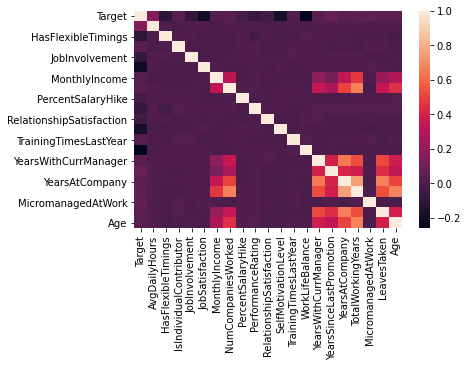

In [39]:
sns.heatmap(data.corr())

#### Filtering the stressed employees data to do understand the trend

In [40]:
stressed = data[data.Target == 1]
stressed

,Target,AvgDailyHours,Department,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,WorkLifeBalance,WorkLoadLevel,YearsWithCurrManager,YearsSinceLastPromotion,YearsAtCompany,TotalWorkingYears,MicromanagedAtWork,LeavesTaken,Age,Gender
3,1,7.10,Sales,4,False,False,4,Manufacturing Director,1,Single,...,2,,1.0,1.0,1.0,2,2,7.0,29,Male
13,1,9.81,Research & Development,4,True,True,4,Laboratory Technician,2,Married,...,1,High,1.0,1.0,9.0,25,2,19.0,46,Female
16,1,9.42,Sales,5,False,True,1,Research Director,2,Married,...,2,,5.0,5.0,5.0,12,5,5.0,48,Female
21,1,10.67,Sales,3,False,False,4,Manager,1,Divorced,...,2,Low,0.0,0.0,0.0,0,3,6.0,25,Female
22,1,7.10,Human Resources,3,False,False,1,Research Scientist,1,Single,...,1,Low,6.0,5.0,6.0,10,5,10.0,46,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,1,6.11,Human Resources,5,False,False,1,Research Scientist,1,Married,...,1,Medium,2.0,3.0,3.0,4,4,5.0,25,Female
15971,1,8.69,Research & Development,5,True,True,3,Manufacturing Director,1,Single,...,1,High,0.0,0.0,0.0,3,5,9.0,53,Female
15978,1,5.95,Sales,5,False,False,1,Sales Executive,1,Divorced,...,2,High,0.0,0.0,0.0,2,1,6.0,24,Male
15983,1,6.24,Research & Development,5,False,False,2,Laboratory Technician,4,Single,...,1,Low,0.0,1.0,6.0,10,3,7.0,43,Male


In [41]:
#### As we can see as the 

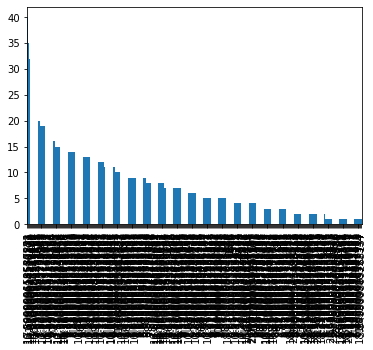

In [42]:
stressed['AvgDailyHours'].value_counts().plot(kind = "bar")

#### Human Resources department employees are usually a bit more stressed than other departments

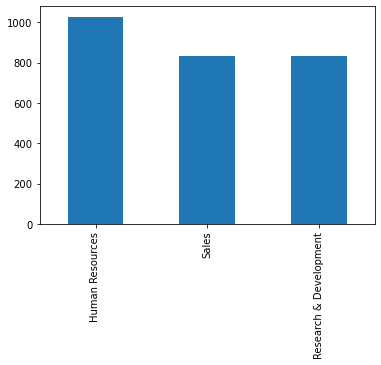

In [43]:
stressed['Department'].value_counts().plot(kind = "bar")

#### As we can see here is employee shave flexibble hourse we see that they are usually less stressed 

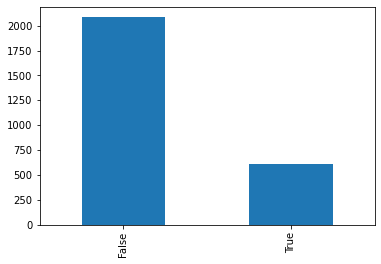

In [44]:
stressed['HasFlexibleTimings'].value_counts().plot(kind = "bar")

#### Seeing the plots we can see that if a emloyee is a individual contributor it means it creates more pressure on to that employee hence this could be a potential reason for the employee to be stressed 

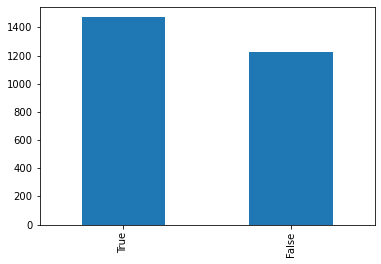

In [45]:
stressed['IsIndividualContributor'].value_counts().plot(kind = "bar")

#### This columns means the feedback from the manager hence if the feedback is low i.e 1 it usually develops stress for employees to perform better and for 2 is the same also good and very good the stress level is less

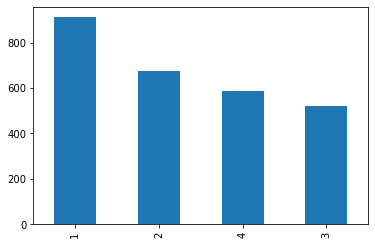

In [46]:
stressed['JobInvolvement'].value_counts().plot(kind = "bar")

#### As we can see job role isnt impacting much the stress level of the employees just a notable things that the sales respresnataives are slightly more stressed than others

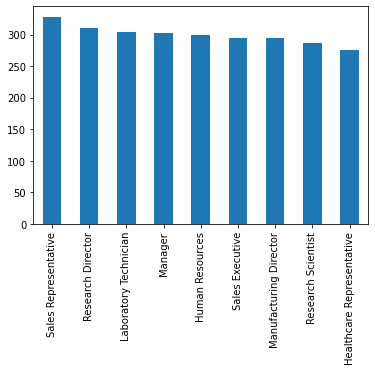

In [47]:
stressed['JobRole'].value_counts().plot(kind = "bar")

#### Job statisfaction is a really import factor in order to understand the stress level as from the trend we can see that the employees with more job satisfaction are less stressed and vice versa

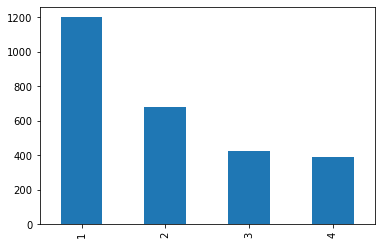

In [48]:
stressed['JobSatisfaction'].value_counts().plot(kind = "bar")

#### Monthly income also is a major variable in understanding the stress level of a employee as we can see that the employees with less salary are more stressed 

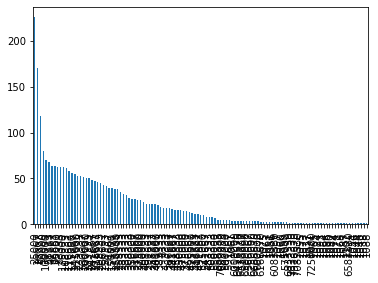

In [49]:
stressed['MonthlyIncome'].value_counts().plot(kind = "bar")

#### As the number of companies increases we can se that the stress level decreases in this case

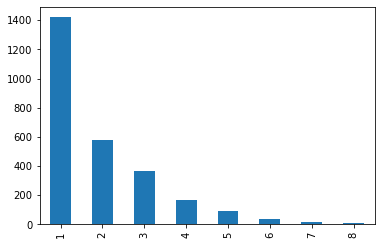

In [50]:
stressed['NumCompaniesWorked'].value_counts().plot(kind = "bar")

#### less the percentage hike more the stress as we can see from the graph this is quite noramal as if the employee is rewarded more they'll be more eager to work without getting burdersome

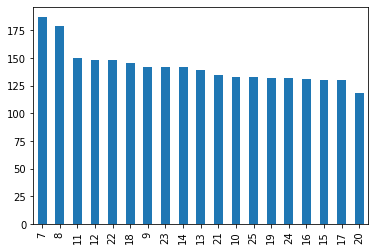

In [51]:
stressed['PercentSalaryHike'].value_counts().plot(kind = "bar")

#### more the performance rating more less the stress which is normal because the emoployees with less rating would try to work more and be better hence due to over work stress can build up

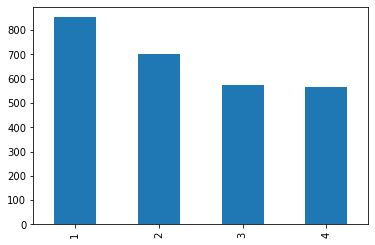

In [52]:
stressed['PerformanceRating'].value_counts().plot(kind = "bar")

#### This variable also plays a important role as stress doesnt always come from work but it can also cause due to personal issues hence we can see from the graphy people with more relationship satisfaction are less stressed 

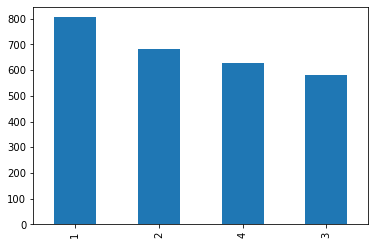

In [53]:
stressed['RelationshipSatisfaction'].value_counts().plot(kind = "bar")

#### Remote work satisfacion is also playing a major role as we can see that if the satisfaction is high stressed is lower because there might be some days where the employee doesnt feel like coming office and working and companies should respect that

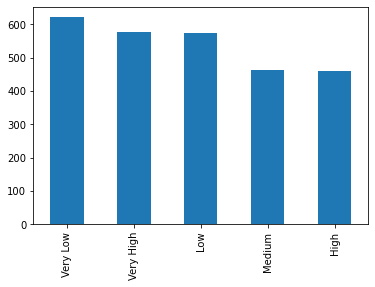

In [54]:
stressed['RemoteWorkSatistfaction'].value_counts().plot(kind = "bar")

#### self motivation is a key to stress as if the employee is self motivated it would be very less chance of them being stressed  and hence as the motivation level is increasing the stress level is decreasing 

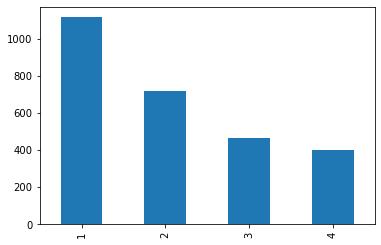

In [55]:
stressed['SelfMotivationLevel'].value_counts().plot(kind = "bar")

#### training time last year isnt impacting the stress level more but we can see if its more than 6 hourse it is causing slight effect on the stress level of the employees

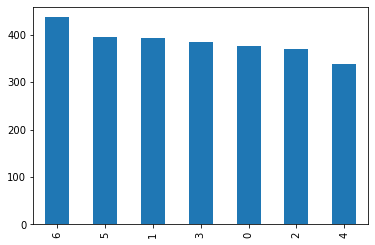

In [56]:
stressed['TrainingTimesLastYear'].value_counts().plot(kind = "bar")

#### work life balance is a major deciding factor as we can see from the graph as it increases the stress level decreases

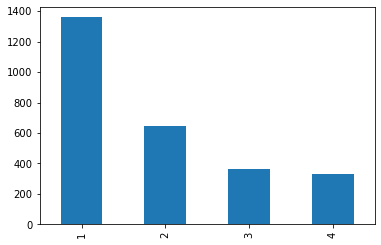

In [57]:
stressed['WorkLifeBalance'].value_counts().plot(kind = "bar")

#### workloadlevel is also major deciding factor  as the workload will be high it causes more stress to the employee

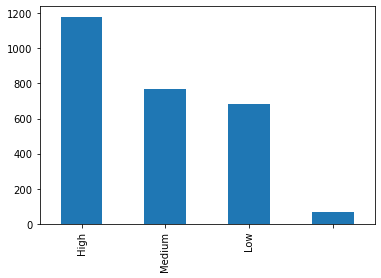

In [58]:
stressed['WorkLoadLevel'].value_counts().plot(kind = "bar")

#### this causes as the years with the managers increases the employee tends to adjust and work efficently with and hence the stress level decreases 

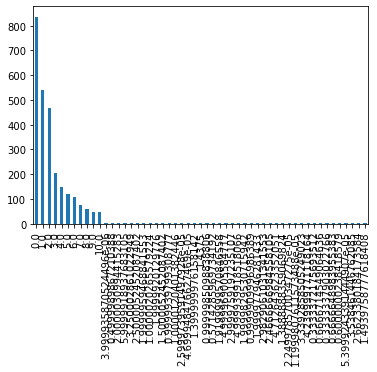

In [59]:
stressed['YearsWithCurrManager'].value_counts().plot(kind = "bar")

#### As the the time since last promotion increases the employees beceome more impatient and hence the stress increases 

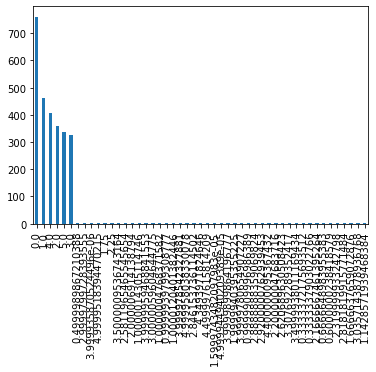

In [60]:
stressed['YearsSinceLastPromotion'].value_counts().plot(kind = "bar")

#### as the years with the a particular company inctreases the employee tends to adjust with enviorment and the employees and hence the stress level decreases as we can see in the graph

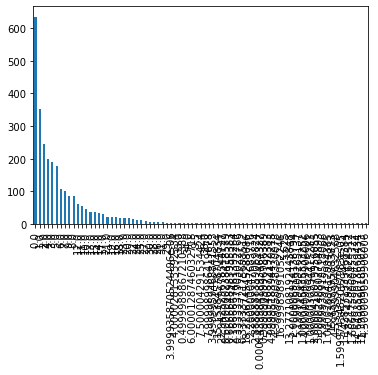

In [61]:
stressed['YearsAtCompany'].value_counts().plot(kind = "bar")

#### Usually experienced people tends to know how to do their working and hence they donot get more stressed with the work and hence the stress level decreases as the total working days increases

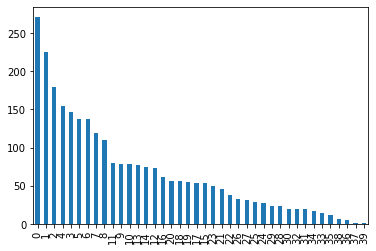

In [62]:
stressed['TotalWorkingYears'].value_counts().plot(kind = "bar")

#### this definetly has an impact to the employees as if a emplyee feels like he micromanaged thier stress level increases as seen by the trend in the graph

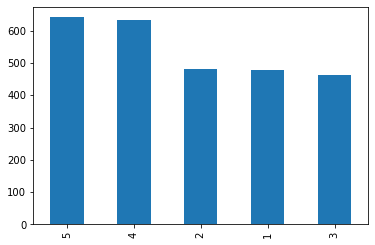

In [63]:
stressed['MicromanagedAtWork'].value_counts().plot(kind = "bar")

#### Who doesnt want to take leaves and enjoy hence people who havent taken more leaves are usually more stressed

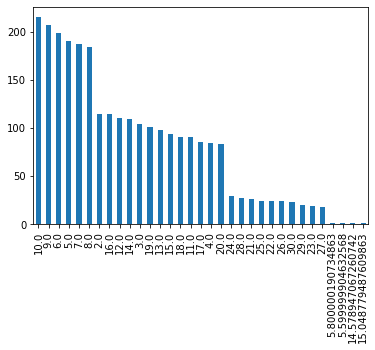

In [64]:
stressed['LeavesTaken'].value_counts().plot(kind = "bar")

####  AS the age increase the experience increase and experienced people are  less stresses than fresher and we can see the trend in the graphs

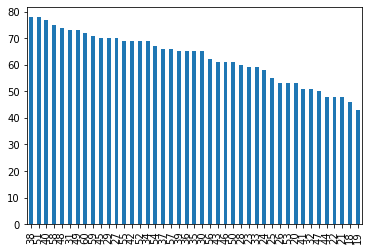

In [65]:
stressed['Age'].value_counts().plot(kind = "bar")

#### In order to feed the categorical variables to the models we need to create dummy variables

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
cat_var = data[['WorkLoadLevel', 'Department', 'Education', 'Gender', 'JobRole', 'MaritalStatus', 'RemoteWorkSatistfaction']]
one_hotted = pd.get_dummies(cat_var)
one_hotted

,WorkLoadLevel_,WorkLoadLevel_High,WorkLoadLevel_Low,WorkLoadLevel_Medium,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RemoteWorkSatistfaction_High,RemoteWorkSatistfaction_Low,RemoteWorkSatistfaction_Medium,RemoteWorkSatistfaction_Very High,RemoteWorkSatistfaction_Very Low
0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
15996,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
15997,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
15998,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [68]:
data = pd.concat([data, one_hotted], axis=1, join='inner')

In [69]:
data = data.drop(['WorkLoadLevel', 'Department', 'Education', 'Gender', 'JobRole', 'MaritalStatus', 'RemoteWorkSatistfaction'], axis = 1)

In [70]:
data.dtypes

Target                                 int32
AvgDailyHours                        float32
HasFlexibleTimings                      bool
IsIndividualContributor                 bool
JobInvolvement                         int32
JobSatisfaction                        int32
MonthlyIncome                          int32
NumCompaniesWorked                     int32
PercentSalaryHike                      int32
PerformanceRating                      int32
RelationshipSatisfaction               int32
SelfMotivationLevel                    int32
TrainingTimesLastYear                  int32
WorkLifeBalance                        int32
YearsWithCurrManager                 float32
YearsSinceLastPromotion              float32
YearsAtCompany                       float32
TotalWorkingYears                      int32
MicromanagedAtWork                     int32
LeavesTaken                          float32
Age                                    int32
WorkLoadLevel_                         uint8
WorkLoadLe

#### Spliting data into target and training data set and also spliting the dataset into training and spliting dta set 

In [71]:
x = data.drop(columns = "Target")
y = data["Target"]

In [72]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1 / 4, random_state=36,)


#### Also scalling the data to fit it to the model

In [73]:
# as the datapoints differ a lot in magnitude, we'll scale them
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x_train)
scaled_data_test=scaler.transform(x_test)

#### Fitting the data with different models

#### KNN 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
KNN.fit(x_train,y_train)
#Predict Output
predicted= KNN.predict(x_test) 
from sklearn.metrics import r2_score
r2_score(y_test,predicted)

-0.4883177570093453

#### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression 
logistic = LogisticRegression(random_state = 0) 
logistic.fit(x_train, y_train)
predicted= logistic.predict(x_test) 
from sklearn.metrics import r2_score
r2_score(y_test,predicted)

-0.2018867924528298

#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(x_train, y_train)
y_predict=classifier.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.12385822606242303

#### Here we encounter a problem as we can see none of them are giving us a good accuracy actually the accuracy is very very low because our model is underfitted. 
#### Hence in this case we will use the reliable XGBoost. It usually take cares of the underfitting and overfitting of the model

In [82]:
# fit model no training data
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
# cheking training accuracy
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,predictions)
accuracy

0.9889208758614674

#### Boom! 90+ Accuracy on test set thats a good one... 

In [84]:
# cheking initial test accuracy
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.902668759811617

#### But we are gonna get greedy here and look to improve more by Hyperparameter tunning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [87]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [88]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[12:16:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.880, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[12:16:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above ca

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.871, total=   0.5s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[12:16:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.870, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[12:16:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.872, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[12:16:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.905, total=   2.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=200 .................
[12:16:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=3, n_estimators=200, score=0.908, total=   2.0s
[CV]  learning_rate=1, max_depth=5, n_estimators=10 ..................
[12:16:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[12:16:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=0.899, total=   2.6s
[CV]  learning_rate=1, max_depth=5, n_estimators=200 .................
[12:17:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=5, n_estimators=200, score=0.

[CV]   learning_rate=1, max_depth=10, n_estimators=50, score=0.898, total=   2.1s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[12:17:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.907, total=   3.4s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[12:17:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not 

[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.908, total=   3.3s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[12:18:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=1, max_depth=20, n_estimators=50, score=0.905, total=   2.9s
[CV]  learning_rate=1, max_depth=20, n_estimators=50 .................
[12:18:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.871, total=   0.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[12:19:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.870, total=   0.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[12:19:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.913, total=   3.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[12:20:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.913, total=   2.9s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[12:20:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.901, total=   2.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[12:20:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.911, total=   2.1s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[12:20:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=10, n_estimators=50, score=0.903, total=   1.9s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50 ...............
[12:21:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=10, n_estimators=50, score=0.901, total=   1.8s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50 ...............
[12:21:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.891, total=   1.0s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[12:22:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.893, total=   0.9s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[12:22:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.910, total=  10.7s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[12:23:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.5, max_depth=20, n_estimators=200, score=0.907, total=  10.4s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 ..............
[12:23:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.921, total=   1.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[12:24:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.915, total=   1.4s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[12:24:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.904, total=   1.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[12:24:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.909, total=   1.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[12:24:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.898, total=   0.5s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[12:25:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.894, total=   0.6s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=10 ...............
[12:25:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.904, total=   6.5s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[12:25:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.909, total=   6.4s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[12:25:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.908, total=   4.5s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[12:26:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.906, total=   4.3s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=100 ..............
[12:26:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.915, total=   0.7s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[12:27:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.910, total=   0.7s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[12:27:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.892, total=   0.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[12:27:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=10, score=0.893, total=   0.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ...............
[12:27:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.899, total=   3.8s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[12:28:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.905, total=   3.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[12:28:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.904, total=   3.5s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[12:28:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=10, n_estimators=100, score=0.908, total=   3.7s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100 .............
[12:28:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.905, total=   2.6s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 ..............
[12:29:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.904, total=   3.0s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 ..............
[12:29:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.871, total=   0.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[12:30:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.870, total=   0.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[12:30:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.913, total=   2.1s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[12:30:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.913, total=   2.2s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[12:30:59] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.901, total=   2.0s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[12:31:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score=0.911, total=   2.3s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[12:31:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.903, total=   2.0s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[12:31:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.901, total=   2.3s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[12:31:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.891, total=   0.7s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[12:32:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.893, total=   0.9s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[12:32:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.910, total=   8.4s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[12:33:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.907, total=   8.2s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[12:33:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 17.8min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [89]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [90]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 50)
new_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
# cheking training accuracy
y_pred = new_model.predict(x_train)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,predictions)
accuracy

0.9842973043705836

#### we dont see a increase in the accuracy due to hyper parameter tunning hence we will discard this model and use our old model

In [92]:
# cheking initial test accuracy
y_pred = new_model.predict(x_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8725798011512297

#### Exporting the model

In [93]:
import pickle

In [94]:
filename = 'xgboost_model.pickle'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))